In [2]:
import random
import numpy as np

'''
5-leg simulator
money:
$ per parlay
% ev:
'''

'\n5-leg simulator\nmoney:\n$ per parlay\n% ev:\n'

In [9]:
money = 1000
parlay = 5
ev = 6

simulations= money/parlay

In [10]:
profits = []

for i in range(1000):

    profit = 0

    for i in range(int(simulations)):
        leg1 = random.randint(0,1000)
        leg2 = random.randint(0,1000)
        leg3 = random.randint(0,1000)
        leg4 = random.randint(0,1000)
        leg5 = random.randint(0,1000)

        legs = [leg1, leg2, leg3, leg4, leg5]
        kept_legs = [i for i in legs if i < ((50+ev) * 10)]

        if len(kept_legs) < 3:
            profit += -1 * parlay
        elif len(kept_legs) == 3:
            profit += (parlay * 0.4) - parlay
        elif len(kept_legs) == 4:
            profit += (parlay * 2) - parlay
        elif len(kept_legs) == 5:
            profit += (parlay * 10) - parlay
    
    profits.append(profit)
        

109.892
112.0


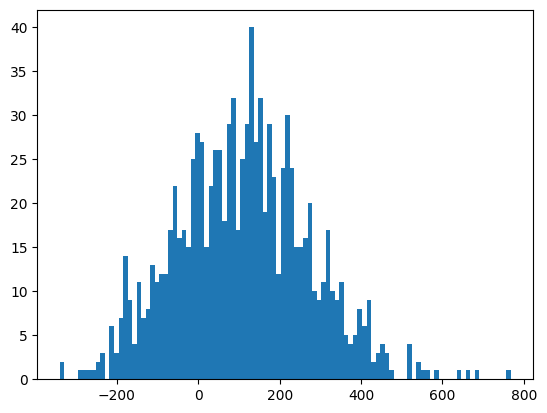

In [13]:
print(np.mean(profits))
print(np.median(profits))

# show distribution of profits
import matplotlib.pyplot as plt
plt.hist(profits, bins=100)
plt.show()
